In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import json

In [3]:
def load(filename):
    with open(filename, "r") as f:
        data = json.load(f)
    return data

In [4]:
data = load("minidataset/psor_examples.json")[1]
annos = data["annotations"]

FileNotFoundError: [Errno 2] No such file or directory: 'minidataset/psor_examples.json'

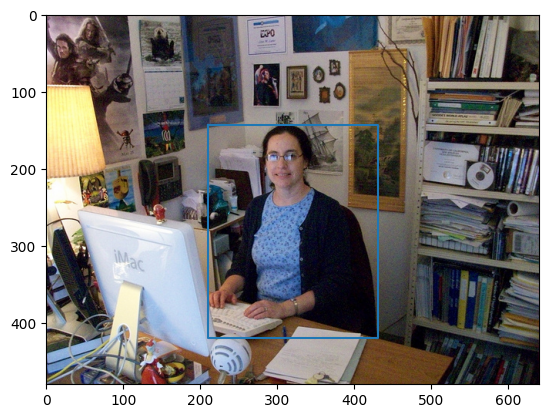

210.0 143.0 430.0 419.0


In [ ]:
x, y, w, h = annos[0]["box"]
x1,y1,x2,y2 = x, y, x+w, y+h
plt.imshow(Image.open("minidataset/examples/"+data["image"]+".jpg"))
plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1])
plt.show()
print(x1, y1, x2, y2)

In [5]:
import os
import pickle


In [6]:
def load(filename):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    return data
lst = os.listdir("debug")
lst[0:3]

['Thu Jul 10 16:32:03 2025',
 'Thu Jul 10 16:31:29 2025',
 'Thu Jul 10 16:31:51 2025']

In [7]:
data = load("debug/"+lst[1])
data.keys()

dict_keys(['texts', 'image_inputs', 'batch', 'labels'])

In [8]:
batch = data["batch"]
batch

{'input_ids': tensor([[151644,   8948,    198,  ...,  13989, 151645,    198],
        [151643, 151643, 151643,  ...,  13989, 151645,    198]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]]), 'pixel_values': tensor([[ 0.4121,  0.4121,  0.4121,  ...,  1.8757,  1.8615,  1.8757],
        [ 0.4559,  0.4559,  0.4559,  ...,  1.9042,  1.8899,  1.9042],
        [ 0.4413,  0.4413,  0.4559,  ...,  1.8757,  1.8899,  1.9184],
        ...,
        [ 0.2807,  0.3099,  0.3099,  ..., -0.6555, -0.6697, -0.6697],
        [ 0.2807,  0.3099,  0.3391,  ..., -0.5986, -0.5701, -0.4990],
        [ 0.4121,  0.3975,  0.3683,  ..., -0.4422, -0.4706, -0.4848]]), 'image_grid_thw': tensor([[ 1, 74, 74],
        [ 1, 74, 74]])}

In [ ]:
batch["input_ids"][0]==151653

tensor([151644,   8948,    198,  ...,  13989, 151645,    198])

In [9]:
batch["input_ids"].shape, batch["attention_mask"].shape, batch["image_grid_thw"].shape, batch["pixel_values"].shape

(torch.Size([2, 1876]),
 torch.Size([2, 1876]),
 torch.Size([2, 3]),
 torch.Size([10952, 1176]))

In [10]:
texts = data["texts"][0]
print(texts)

<|im_start|>system
You are a Vision Language Model specialized in Salient Object Ranking, a task focused on predicting the sequential order of human attention shifts among objects in a scene. Your task is to detect salient objects, and rank them from most to least salient, and output the results in the following strict JSON format:
    ```json
    {
        "results": [
            {"rank": 1, "category": "dog", "bbox": {"x1": 50, "y1": 120, "x2": 200, "y2": 300}},
            {"rank": 2, "category": "car", "bbox": {"x1": 250, "y1": 80, "x2": 400, "y2": 180}},
            {"rank": 3, "category": "tree", "bbox": {"x1": 10, "y1": 50, "x2": 150, "y2": 350}}
        ]
    }
    ```
    <|im_end|>
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant
{"results": [{"rank": 1, "bbox": {"x1": 123, "y1": 398, "x2": 571, "y2": 757}, "category": "horse"}, {"rank": 2, "bbox": {"x1": 347, "y1": 377, "x2": 457, "y2": 550}, "category": "person"}, {"rank": 3, "bb

In [11]:
image_inputs = data["image_inputs"][0]
print(image_inputs)

[<PIL.Image.Image image mode=RGB size=1036x1036 at 0x7D084E197100>]


In [15]:
labels = data["labels"][0]
labels


tensor([151644,   8948,    198,  ...,  13989, 151645,    198])

In [14]:
labels.shape


torch.Size([1876])